<a href="https://colab.research.google.com/github/hhboorstein/number-theory/blob/main/nt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prime Projects

## Prime Number Generator

Calculates primes up to a user-defined bound. Checks each positive integer for prime divisibility, and appends the candidate if prime.

In [2]:
import numpy as np

def prime_list(bound):
  '''Make a list of prime numbers
  up to bound. Requires numpy package.'''
  primes=[]
  for i in range(2,bound+1):
    proceed=True
    for p in primes:
      if np.sqrt(i)<p:
        break
      if i%p==0:
        proceed=False
        break
      else:
        continue
    if proceed==True:
      primes.append(i)
  return primes

In [4]:
print(prime_list(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## Sieve of Eratosthenes

Another technique for calculating prime numbers up to a user-specified bound. The difference here is that all multiples of primes are sieved out at once, and what's left must be prime.

In [5]:
def sieve(bound):
  '''Sieves out primes
  up to bound.'''
  bound +=1
  primes=range(2,bound) #this will only contain primes at the end
  for i in range(2,bound):
    if i**2>bound: #more optimized halting condition
      break
    if i in primes:
      mult_i=[i*j for j in range(i,(bound//i)+1)] #list of prime mults
      primes=[n for n in primes if n not in mult_i] #sieve out mult_i
  return primes

In [7]:
print(sieve(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [8]:
print(sieve(100)==prime_list(100))

True


In [13]:
#which is faster?
import time

a=10000

t0=time.time()
prime_list(a)
t1=time.time()
print('prime_list takes',t1-t0,'seconds')

t2=time.time()
sieve(a)
t3=time.time()
print('sieve takes', t3-t2,'seconds')

prime_list takes 0.089752197265625 seconds
sieve takes 1.0314862728118896 seconds


It looks like the prime_list function is faster than the sieve approach. For primes up to 100,000, prime_list took one second and I interrupted sieve after a minute. Huge difference. There are surely ways to further optimize both.

## Twin Primes

Using the prime_list function, the following counts the number of twin prime pairs up to a bound and records the pairs as tuples. (Requires declaration of prime_list function.)

In [3]:
print("We will be finding the number of twin primes, \n i.e., primes that differ by 2, \n up to a given bound.")
b=int(input("Input bound: "))
primes=prime_list(b)
twins=[]
count=0
for i in range(len(primes)-1):
  if primes[i]+2==primes[i+1]:
    count+=1
    twins.append((primes[i],primes[i+1]))
print("There are", count, "pairs of twin primes up to", b)
print("The twin primes less than", b, "are:")
print(twins)

We will be finding the number of twin primes, 
 i.e., primes that differ by 2, 
 up to a given bound.
Input bound: 100
There are 8 pairs of twin primes up to 100
The twin primes less than 100 are:
[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73)]


# Collatz

The Collatz conjecture is an open problem in number theory that is simple to state. For a positive integer $n$, we consider the following function: $f(n)=n/2$ if $n$ is even, otherwise $f(n)=3n+1$.

It seems that after sufficiently many steps, any positive integer will reach $1$. It is unknown whether this is indeed true for all positive integers. While [experimental evidence](https://en.wikipedia.org/wiki/Collatz_conjecture#Experimental_evidence) shows that all *reasonable* numbers do reach $1$, a max_step halting condition is included for completeness and the practicalities of limited computing resources.

In [4]:
def collatz(n,max_step):
  '''
  Runs the Collatz function
  on n; returns number of steps to 1.
  Will time out after max_step.
  '''
  #Hardcode n=0 case so it doesn't
  #have to loop max_step times to get step=0
  if n==0:
    return 0
  #general logic
  step=0
  while n!=1:
    #timeout condition
    if step>max_step:
      return 0
    #collatz function
    if n%2==0:
      n=n//2
    else:
      n=3*n+1
    step+=1
  return step

This will graph the number of steps it takes 
 for integers to complete the Collatz procedure.
Calculate for integers up to: 100000
Upper bound of computation for each integer: 400


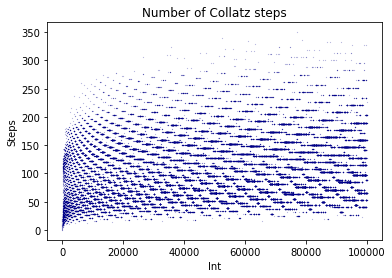

In [10]:
import numpy as np
import pandas as pd

print("This will graph the number of steps it takes \n for integers to complete the Collatz procedure.")
bound=int(input("Calculate for integers up to: "))
u=int(input("Upper bound of computation for each integer: "))

#Create step list
step_list=[collatz(n,u) for n in range(bound+1)]

#generate dataframe
#two columns: integers, steps
df=pd.DataFrame([[i,step_list[i]] for i in range(bound+1)],columns=['Int','Steps'])

#dotsize helps with graph readability
dotsize=1000/bound

#plot data
col=df.plot.scatter('Int','Steps',s=dotsize,c='DarkBlue',title='Number of Collatz steps')